In [1]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.dissimilarity as dissimilarity
import mlgrad.pbsag as pbsag
import mlgrad.pbfg as pbfg

import matplotlib.pyplot as plt
#plt.style.use('bmh')
%matplotlib inline

In [2]:
lm_orig = model.LinearModel([2.,3.])
lm_orig

In [3]:
N = 100
X = np.random.random((N,1))
Y = np.array([lm_orig.evaluate(x) for x in X])
dY = 2.0*np.random.random((N,))-1
Y1 = Y + 0.1*dY*dY

In [4]:
loss_func = loss.SquareLoss()
loss_func

In [5]:
penalty_func = dissimilarity.Square()
penalty_func

In [6]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)

In [7]:
alg = pbsag.PbSAG(lm_learn, loss_func, penalty_func, h=1.0)
alg.fit(X, Y1)
print("K:", alg.K, "hw:", alg.hw, "hs:", alg.hs)

K: 195 hw: 1.0 hs: 1.0


In [8]:
#print(alg.param_mean, alg.s_mean)
#print(np.sqrt(np.abs(alg.param2_mean - alg.param_mean**2))/np.abs(alg.param_mean), 
#      np.sqrt(np.abs(alg.s2_mean - alg.s_mean**2))/np.abs(alg.s_mean))

In [9]:
lm_learn

In [10]:
Y_p = np.array([lm_learn.evaluate(x) for x in X])
#np.abs(Y-Y_p)

In [11]:
import sklearn.metrics as metrics
metrics.r2_score(Y, Y_p)

0.998393627826343

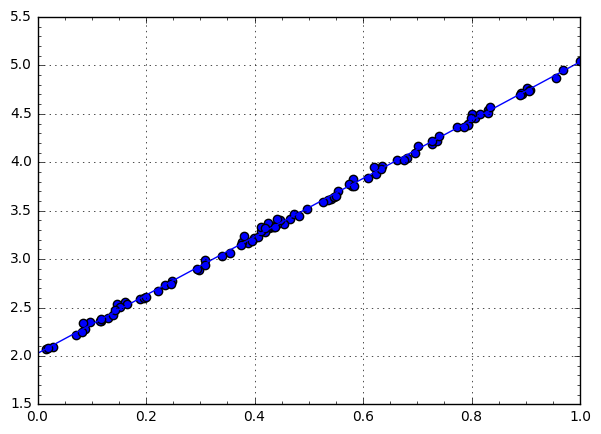

In [12]:
plt.figure(figsize=(7,5))
xs = np.linspace(0., 1., 100)
xs = xs.reshape((-1,1))
ys = np.array([lm_learn.evaluate(x) for x in xs])
plt.scatter(X[:,0], Y1, s=36)
plt.plot(xs, ys)
plt.grid(1)
plt.minorticks_on()
plt.xlim(0,1)
plt.show()

## 

In [24]:
param_init2 = np.random.random((2,))
lm_learn2 = model.LinearModel(param_init2)

alg2 = pbfg.PbFG(lm_learn2, loss_func, penalty_func, h=0.5, newton=0)
alg2.fit(X, Y1)
print("K:", alg2.K, "hw:", alg2.hw, "hs:", alg2.hs, lm_learn2.param.base)

K: 379 hw: 0.5 hs: 0.5 [ 2.02729606  3.00914634]


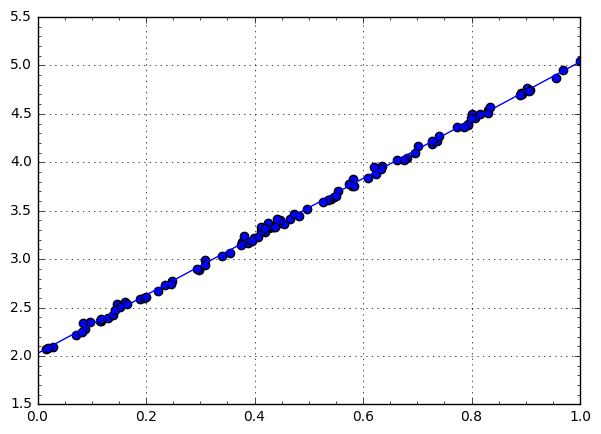

In [25]:
plt.figure(figsize=(7,5))
xs = np.linspace(0., 1., 100)
xs = xs.reshape((-1,1))
ys = np.array([lm_learn2.evaluate(x) for x in xs])
plt.scatter(X[:,0], Y1, s=36)
plt.plot(xs, ys)
plt.grid(1)
plt.minorticks_on()
plt.xlim(0,1)
plt.show()